# Retrieving Knowledge Graph Embedding Vectors from KGvec2go
[KGvec2go](http://kgvec2go.org/) is a service providing embedding vectors for different knowledge graphs, such as DBpedia, via a REST API. This example notebook shows how to retrieve vectors from KGvec2go, and also to create a visualization.

In [1]:
import requests
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In this example, we use two sets of entities, named `instances1` and `instances2`. Those should later be visualized in a plot in different colors. Each of them should be a name which, appended to `http://dbpedia.org/resource`, yield a valid [DBpedia](http://dbpedia.org/) URI.

The two sets of intsances are a subset of the cities benchmark in [this benchmark collection](https://github.com/mariaangelapellegrino/Evaluation-Framework). They denote cities with a high or low quality of living, respectively.

In [2]:
# define sets of instances of interest
instances1 = ["Vancouver","Zurich","Vienna","Bern","Sydney","Geneva","Auckland","Copenhagen","Helsinki","Amsterdam"]
instances2 = ["Brazzaville","Khartoum","Baghdad","Bangui","Luanda","Ouagadougou","Kinshasa","Bamako","Niamey","Belgrade"]
instances = np.concatenate([instances1,instances2])

For each of the instances, we start a request to KGvec2go, and collect the resulting vectors in an array:

In [3]:
# get vectors from KGvec2go
result = []
for i in instances:
    r = requests.get("http://kgvec2go.org/rest/get-vector/dbpedia/" + i)
    x = json.loads(r.text)
    result.append(x['vector'])

The resulting vectors have a couple hundred dimensions, so we need to reduce them further. Here, we use PCA to get to a 2-dimensional representation:

In [4]:
# compute PCA
frame = pd.DataFrame.from_records(result)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(frame)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

The principal components can then be used to populate a two-dimensional scatter plot:

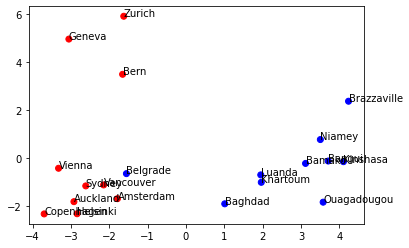

In [5]:
# generate visualization
# instances1 are colored red, instances2 are colored blue
colors = np.concatenate([np.full(len(instances1),'#FF0000'),np.full(len(instances2),'#0000FF')])
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=colors)
for k, v in principalDf.iterrows():
    plt.annotate(instances[k], v)